# **DATA PROFILING**

## Objectives

* Take a closer look at data. Understand data types, distribution, gaps (i.e. missing values).
## Inputs

* Raw data (house_prices_records.csv)

## Outputs

* One cleaned dataset of house_prices_records that is ready for Exploratory Data Analysis.

## Additional Comments

* In the Data Collection phase, we inspected inherited_houses.csv file manually. It was easy to do so because of only 4 raws of data. We concluded that the only difference from "house_prices_records.csv" is the absence of SalePrice. For the data cleaning purpose, we are only focusing primary dataset i.e. (house_price_records.csv), because inherited house dataset is (1) irrelavant for EDA and (2) complete and ready to use as it is.


---

# Data Profiling Master Summary

Data profiling is not linear process, hence summarising all the conclusions derived in the sections below.

**Data Quality**

- No two rows are similar (zero duplicates)

- All numerical variables confirms to range provided by metadata.

- All categorical variables confirms to categories provided by metadata. However,
    - There are no houses where Overall Condition excellent (OveralCond = 10)
    - There are no houses where Overall Qual is poor (OverallQual = 1)
    
- ```SalePrice```which will be our target variable down the line, has zero missing values. Good news for analysis and prediction.

- ```EnclosedPorch``` and ```WoodDeckSF``` columns have about 90% data missing. Consider to drop them for analysis.

- ```['2ndFlrSF','MasVnrArea','OpenPorchSF']``` for each of these columns, significant data (45% -50%) contains 0 (zero) as value. Following analysis, it is concluded that this is random and unrelated and hence we will consider it nature of dataset.

- Basement finish and Kitchen Quality are recorded seperately, but it may affect the Overall Quality, which is also recorded seperately.

- All categorical variables are ordinal in nature.


**Correlation of Sales Price with other variables**

- Person and Spearman Correlation shows good correlation (greater than 0.6) between Sales Price and

    - Above Ground Living Area (GrLivArea)

    - Total square feet of Basement Area (TotalBsmtSF)

    - 1st floor square feet (1stFlrSF)
    
    - Garage Area (GarageArea)



**Predictive Power Score**

PPS study shows that the following variables are moderate predictor of Sales Price

```['GarageArea','GarageFinish','KitchenQual','YearBuilt']```.

```OverallQual``` have better predicting power and boxplot shows it clearly that a good overall quality increases the price of the property.




**Consise summary for stakeholders**

- Higher overall quality, the higher the sale price.

- Typically, the larger the house built-up area, the higher the sale price. It matters more than lot size. 

- House features such as a basement, first floor and garage add value to the house.

- The higher the quality of a basement finish, the higher the sale price.

- The newer the house, the higher the sales price is.

**Considerations for feature engineering**

- ```LotFrontage```has 17.7 % missing values. However, it seems to be highly overall correlated with ```LotArea```, It also makes sense in physical world. Bigger the lot area, the higher the chances that LotFrontage (i.e. linear feet of street connected to property) is bigger. So, we can leverage this relation for missing data imputaion.

- ```GarageFinish```has 11.1% missing values. It seems to be highly correlated with ```GarageArea```. In phsyical world, they are independent. For example, a bigger garden does not nessarily mean high qality finish. So, we may have to look at other areas to find imputation strategies, for ex. distribution.

- ```BsmtFinType1```has 7.8% missing values. It seems to be highly correlated with ```BsmtExposure```. In physical world, "walkout or garden level walls exposure level" and "quality of basement" are independent. So, perhaps this correlation is just coinsidence. So, we may have to look at other strategies for data impuration, for ex. distribution.

- ```BedroomAbvGr```has 6.8% missing values. It seems to be highly correlated with ```2ndFlrSF```and ```GrLivArea```. In physical world it kind of makes sense. Having a bedroom above ground will certainly increase 2nd floor surface area. It may or may not affect above ground living area, because they may be treating bedroom area and living area seperately for record purpose. So, we can leverage first relationship to imputate data.

- ```GarageYrBlt```has 5.5% missing values. It seems to be highly correlated with ```GarageArea``` , ```SalePrice```and ```YearRemodAdd```. In physical world, it may be possible that with time (GarageYrBlt), larger and larger (or smaller and smaller) garages were built. It is possible that with newer the garage, better the sales price. We can explore these relationships further for missing data imputation. 

- ```SalePrice``` has very high Skewness of 1.8 and very high Kurtosis of 6.5. We will need to apply transformations to deal with it.


- 4 categorical variables have not been coded numerically.

---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [ ]:
import os
current_dir = os.getcwd()
current_dir

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [ ]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

Confirm the new current directory

In [ ]:
current_dir = os.getcwd()
current_dir

---

# Data Profiling

Let's import all necessary module in the beginning.

In [ ]:
import os

# plotting lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# data profiling lib
from ydata_profiling import ProfileReport
import ppscore as pps

## Schema validation

Check that data confirms to schema outlined in metadata

In [ ]:
# Make sure to work on a copy of data
df_source_data=pd.read_csv("inputs/datasets/raw/house_prices_records.csv")
df=df_source_data.copy()
df.head(5)

There are 24 columns. Column name description is provided in metadata for additional context. This can help determine data type.

## Data type conversion

This step is important so correct categorical variables are identified for profiling down the line.

In [ ]:
cat_data_col=('BsmtExposure','BsmtFinType1','GarageFinish','KitchenQual','OverallCond','OverallQual')

for cat in cat_data_col:
    df[cat]=df[cat].astype('category')

print(df.dtypes)

## Run detailing profiling

In [ ]:
# Note : A copy of report is saved and provided down the line, to avoid re running cell again and again

profile = ProfileReport(df=df)
profile.to_notebook_iframe()

In [ ]:
profile.to_file(output_file='outputs/profiling_report_output.html')

## Primary Findings

**Variables**

- Therere are 24 variables in total. 16 Variables are numerical and 8 are categorical.

- All eight categorical variables are ordinal in nature. four of them are numerically encoded and four are not.
    - For analysis purpose YearBuilt and YearRemodAdd have been treated as categorical ordinal value. This will provide context for "an apartment build before year X.. or after year Y"

- All numerical variables conforms to min-max range provided in metadata.
    - However, there are no apartments where OverallCond = 10 (excellent)
    
- All categorical variable conforms to categories provided in metadata. 
    

#### Missing values and possible approaches

- ```SalePrice```which will be our target variable down the line, has zero missing values. Good news for analysis and prediction.

- ```EnclosedPorch``` and ```WoodDeckSF``` columns have about 90% data missing. Consider to drop them for analysis.

- ```LotFrontage```has 17.7 % missing values. However, it seems to be highly overall correlated with ```LotArea```, It also makes sense in physical world. Bigger the lot area, the higher the chances that LotFrontage (i.e. linear feet of street connected to property) is bigger. So, we can leverage this relation for missing data imputaion.

- ```GarageFinish```has 11.1% missing values. It seems to be highly correlated with ```GarageArea```. In phsyical world, they are independent. For example, a bigger garden does not nessarily mean high qality finish. So, we may have to look at other areas to find imputation strategies, for ex. distribution.

- ```BsmtFinType1```has 7.8% missing values. It seems to be highly correlated with ```BsmtExposure```. In physical world, "walkout or garden level walls exposure level" and "quality of basement" are independent. So, perhaps this correlation is just coinsidence. So, we may have to look at other strategies for data impuration, for ex. distribution.

- ```BedroomAbvGr```has 6.8% missing values. It seems to be highly correlated with ```2ndFlrSF```and ```GrLivArea```. In physical world it kind of makes sense. Having a bedroom above ground will certainly increase 2nd floor surface area. It may or may not affect above ground living area, because they may be treating bedroom area and living area seperately for record purpose. So, we can leverage first relationship to imputate data.

- ```GarageYrBlt```has 5.5% missing values. It seems to be highly correlated with ```GarageArea``` , ```SalePrice```and ```YearRemodAdd```. In physical world, it may be possible that with time (GarageYrBlt), larger and larger (or smaller and smaller) garages were built. It is possible that with newer the garage, better the sales price. We can explore these relationships further for missing data imputation. 

If we address all of the above, it will cover almost 50% of total missing values and bring the missing value percentage at dataset level from 9.8% to nearly 5%. This is acceptable to work with for prediction purpose.

Alternate argument : Sometimes including all correlated variables as features can lead to biased predictions. So, an alternate can be to include only non-correlated variables i.e. choosing only on of two highly correlated variables as feature. In that case we will not not address missing data in "all the columns" but only those that are relevant.

#### Duplicates

There are no duplicate rows

#### Zeros

- ```['2ndFlrSF','MasVnrArea','OpenPorchSF']```contains between 45-50% zero as a value. This is possible in physical world. Let's have a look at it.

In [ ]:
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set(style="whitegrid")

sns.pairplot(df[['2ndFlrSF','MasVnrArea','OpenPorchSF']])

As you can see from the historgram, the distribution for each variable is extremely skewed. 

The scatterplot confirms that the variables are also not unrelated.So, we conclude that this is just the reality. 

Meaning, most of the houses does not have any open porch, 2nd floor or Masonry Veneer.

#### Sale Price

In [ ]:
## Source code taken from : https://python-graph-gallery.com/24-histogram-with-a-boxplot-on-top-seaborn/

sns.set_theme()
 
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# assigning a graph to each ax
sns.boxplot(df["SalePrice"], orient="h", ax=ax_box)
sns.histplot(data=df, x="SalePrice", ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()

The data seems to have positive Kurtosis and Positive Skewness ( right tail). Let's quantify.

In [ ]:
print(f"Kurtosis : {round(df['SalePrice'].kurt(),2)}")
print(f"Skewness : {round(df['SalePrice'].skew(),2)}")

A Skewness of 1.8 is considered very high.

A Kurtosis of 6.5 is considered very high.

**Conclusion**

Down the line will to apply transformation to deal with high level of Skewness and Kurtosis to have more balanced dataset for prediction purpose.

In [ ]:
df['SalePrice'].describe()

Around 50% of the total houses sold have prices betwen 129975 and 214000.

## Correlation

The profiling report indicates good correlation between ```SalePrice```and ```['1stFlrSF','GarageArea','GarageYrBlt','GrLivArea','TotalBsmtSF']```. So, let's explore that

In [ ]:
df_corr = df.corr(method='pearson')
df_corr.filter(['SalePrice']).sort_values(by='SalePrice', key=abs, ascending=False)

In [ ]:
# Set up custome function to show correlation heatmap
# Code adapted from EDA unit 2 Notebook 2

def heatmap_corr(data, threshold, figsize=(8,8), annot_size=8):
  # we create the mask for the upper diagonal and
  # show only values greater than the threshold
  mask = np.zeros_like(data, dtype=np.bool)
  mask[np.triu_indices_from(mask)] = True
  mask[abs(data) < threshold] = True

  # we plot the heatmap as usual
  fig, axes = plt.subplots(figsize=(8,8))
  sns.heatmap(data=data, annot=True, xticklabels=True, yticklabels=True,
              mask=mask, cmap='viridis', annot_kws={"size": annot_size}, ax=axes,
              linewidth=0.5
                    )
  plt.ylim(len(data.columns),0)
  plt.show()

In [ ]:
#Plot heat map
heatmap_corr(data= df_corr, threshold=0.6)

It looks like sales prices is linearly correlated with
 
    - Above Ground Living Area (GrLivArea)
    - Total square feet of Basement Area (TotalBsmtSF)
    - 1st floor square feet (1stFlrSF)
    - Garage Area (GarageArea)

Note that Pearson correlation does not account for non-linear relationship. So, let's explore that with ```Spearman```. We will repeat the steps mentioned above, but now with spearman

In [ ]:
df_corr = df.corr(method='spearman')
df_corr.filter(['SalePrice']).sort_values(by='SalePrice', key=abs, ascending=False)
heatmap_corr(data= df_corr, threshold=0.6)

It does not reveal any additional relationship for sales price. However, it does reveal strong correlation between LotFrontage and LotArea that was previous not discovered in pearson correlation study. 

Let's plot all of these.

In [ ]:
df_plotting=df[['SalePrice','1stFlrSF','2ndFlrSF','GarageArea','GrLivArea','LotArea','TotalBsmtSF']]
df_plotting

In [ ]:
sns.pairplot(data=df_plotting)

The pairplot above reveals that 
- Sale prices typically increases with TotalBasmtSF, GrLivArea and 1stFlrSF. Meaning, larger the house, higher the sale price. This is representative of reality.

Let's have a closer look and see which of these variables have good predictive power for Sales price.

There are correlations between some other variables, but it is not the foucs of study for now.

#### Predictive power score

In [ ]:
pps_matrix_raw=pps.matrix(df)

In [ ]:
pps_matrix = pps_matrix_raw.filter(['x', 'y', 'ppscore']).pivot(columns='x', index='y', values='ppscore')

In [ ]:
def heatmap_pps(df,threshold, figsize=(30,30), font_annot = 10):
    if len(df.columns) > 1:

      mask = np.zeros_like(df, dtype=np.bool)
      mask[abs(df) < threshold] = True

      fig, ax = plt.subplots(figsize=figsize)
      ax = sns.heatmap(df, annot=True, annot_kws={"size": font_annot},
                       mask=mask,cmap='rocket_r', linewidth=0.05,
                       linecolor='lightgrey')
      
      plt.ylim(len(df.columns),0)
      plt.show()

In [ ]:
heatmap_pps(df=pps_matrix, threshold=0)

In [ ]:
# Need to filter PPS score to focous on a few
# Since it is a relative term, we need to focus on IQR whih is 0 to 0.058

pps_matrix_raw.query("ppscore < 1").filter(['ppscore']).describe().T

In [ ]:
# IQR range is 0-0.58 , so a threshold is set just above to see which variables have predictive power

heatmap_pps(df=pps_matrix, threshold=0.15)

It looks like the ```['GarageArea','GarageFinish','KitchenQual','OverallQual','YearBuilt']``` can hold predictive power over ```SalePrice```. 

```OverallQual``` have better predicting power and others have somewhat weak predictive power. Let's have a look at them one by one, to see if we can spot any patterns.

**Garage Area**

In [ ]:
sns.set_theme()
sns.set_context('paper')
sns.lmplot(
    data=df,
    x="GarageArea", y="SalePrice",markers='x'
).set


Typically, sales prices increases with garage area.

**Kitchen Quality**

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,15))
p=sns.boxplot(data=df, y='SalePrice', x='KitchenQual', order=['Fa','TA','Gd','Ex'])
p.axes.set_title("Kitchen Quality", fontsize=30)
p.axes.set_ylabel("Sale Price",fontsize=20)
p.axes.set_xlabel("Kitchen Quality",fontsize=20)
plt.show()

It is clear that better kitchen quality means better sale price

**Overall Quality**

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,15))
p=sns.boxplot(data=df, y='SalePrice', x='OverallQual')
p.axes.set_title("Overall Quality", fontsize=30)
p.axes.set_ylabel("Sale Price",fontsize=20)
p.axes.set_xlabel("Overall Quality",fontsize=20)
plt.show()

There is a clear trend, where increase in quality lead to increase in sale price. The trend is obvious and realistic of physical world.

**Garage Finish**

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,15))
p=sns.boxplot(data=df, y='SalePrice', x='GarageFinish', order=['None','Unf','RFn','Fin'])
p.axes.set_title("Garage Finish", fontsize=30)
p.axes.set_ylabel("Sale Price",fontsize=20)
p.axes.set_xlabel("Garage Finish",fontsize=20)
plt.show()

Plot clearly shows a shift in meadian Sale price as Garage Finish quality increases

**Year Built**

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

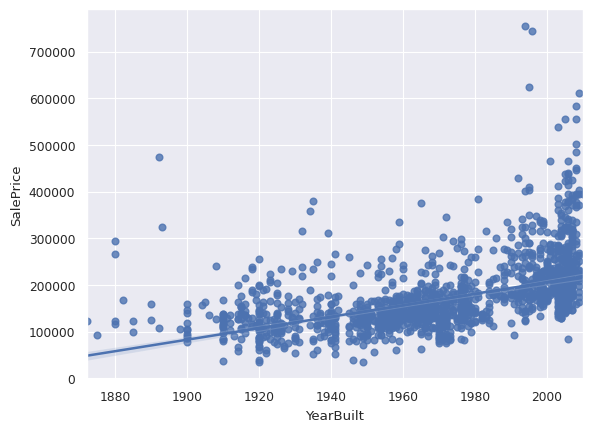

In [67]:
sns.set_theme()
sns.set_context('paper')

sns.regplot(
    data=df,
    x="YearBuilt", y="SalePrice",robust= True
    )


Typically, newly sold houses are sold at higher price.

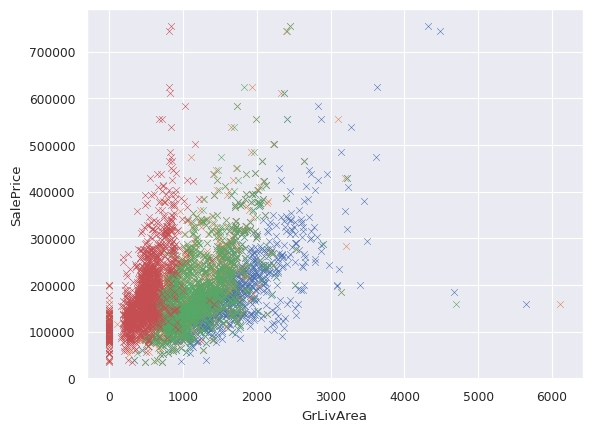

In [75]:
dataset_cols=['GrLivArea','TotalBsmtSF','1stFlrSF','GarageArea']#,'GarageYrBlt']

for col in dataset_cols:
    sns.set_theme()
    sns.set_context('paper')
    sns.scatterplot(data=df,x=col, y="SalePrice",marker='x',)

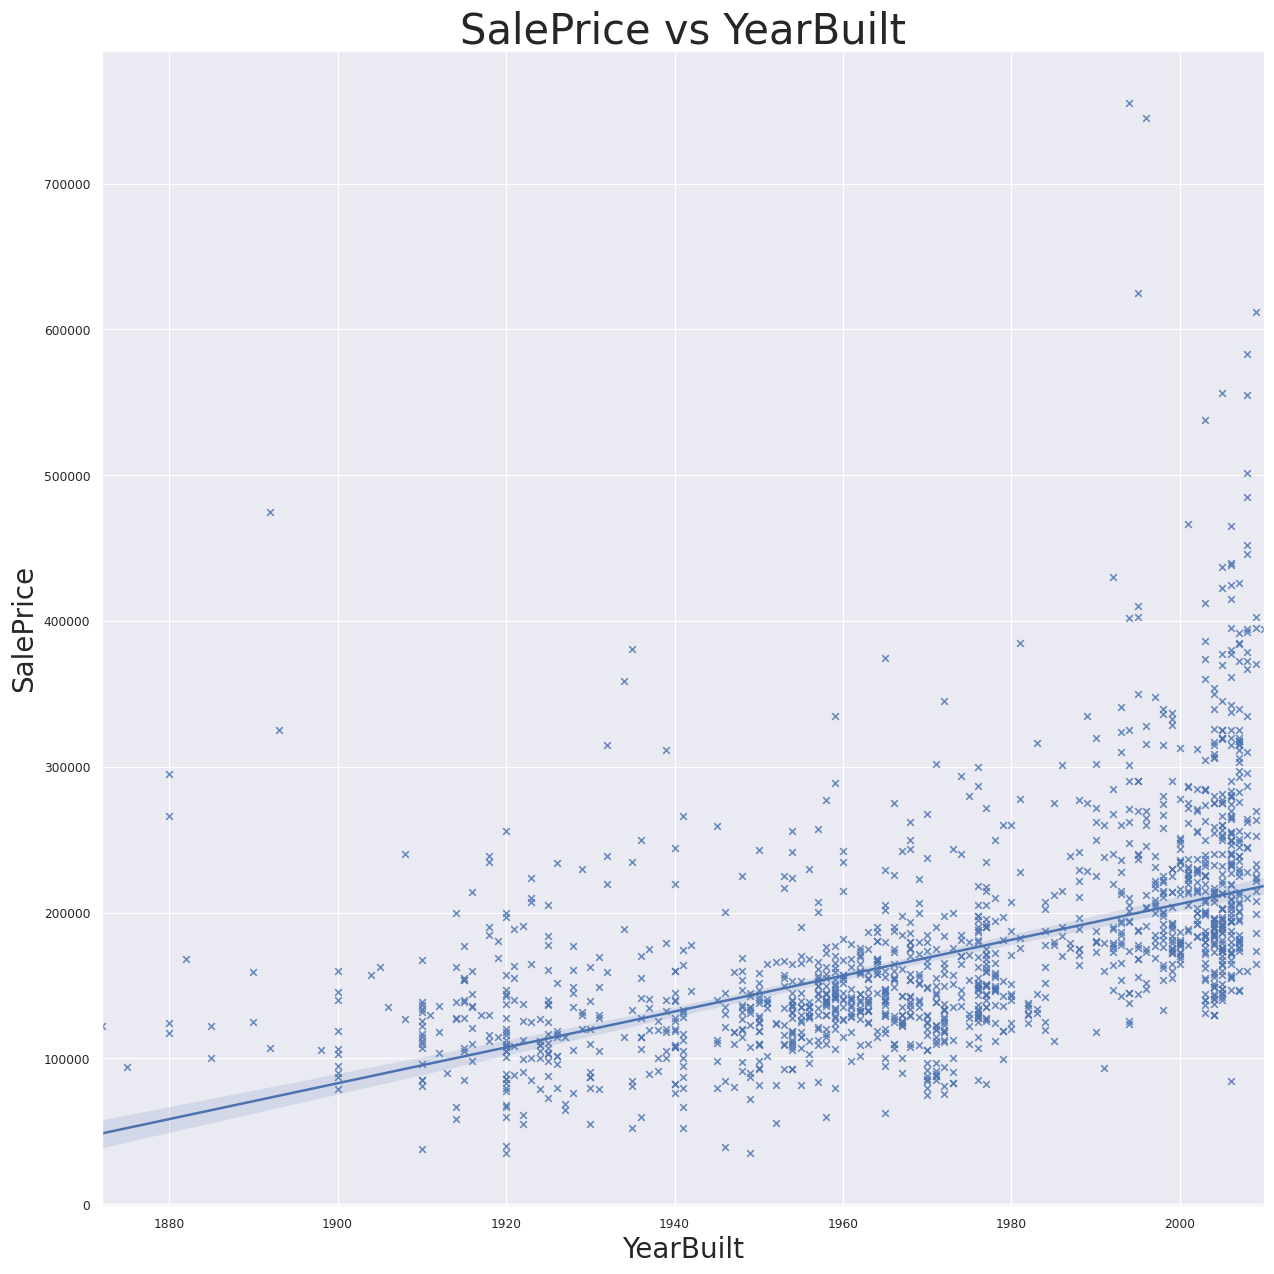

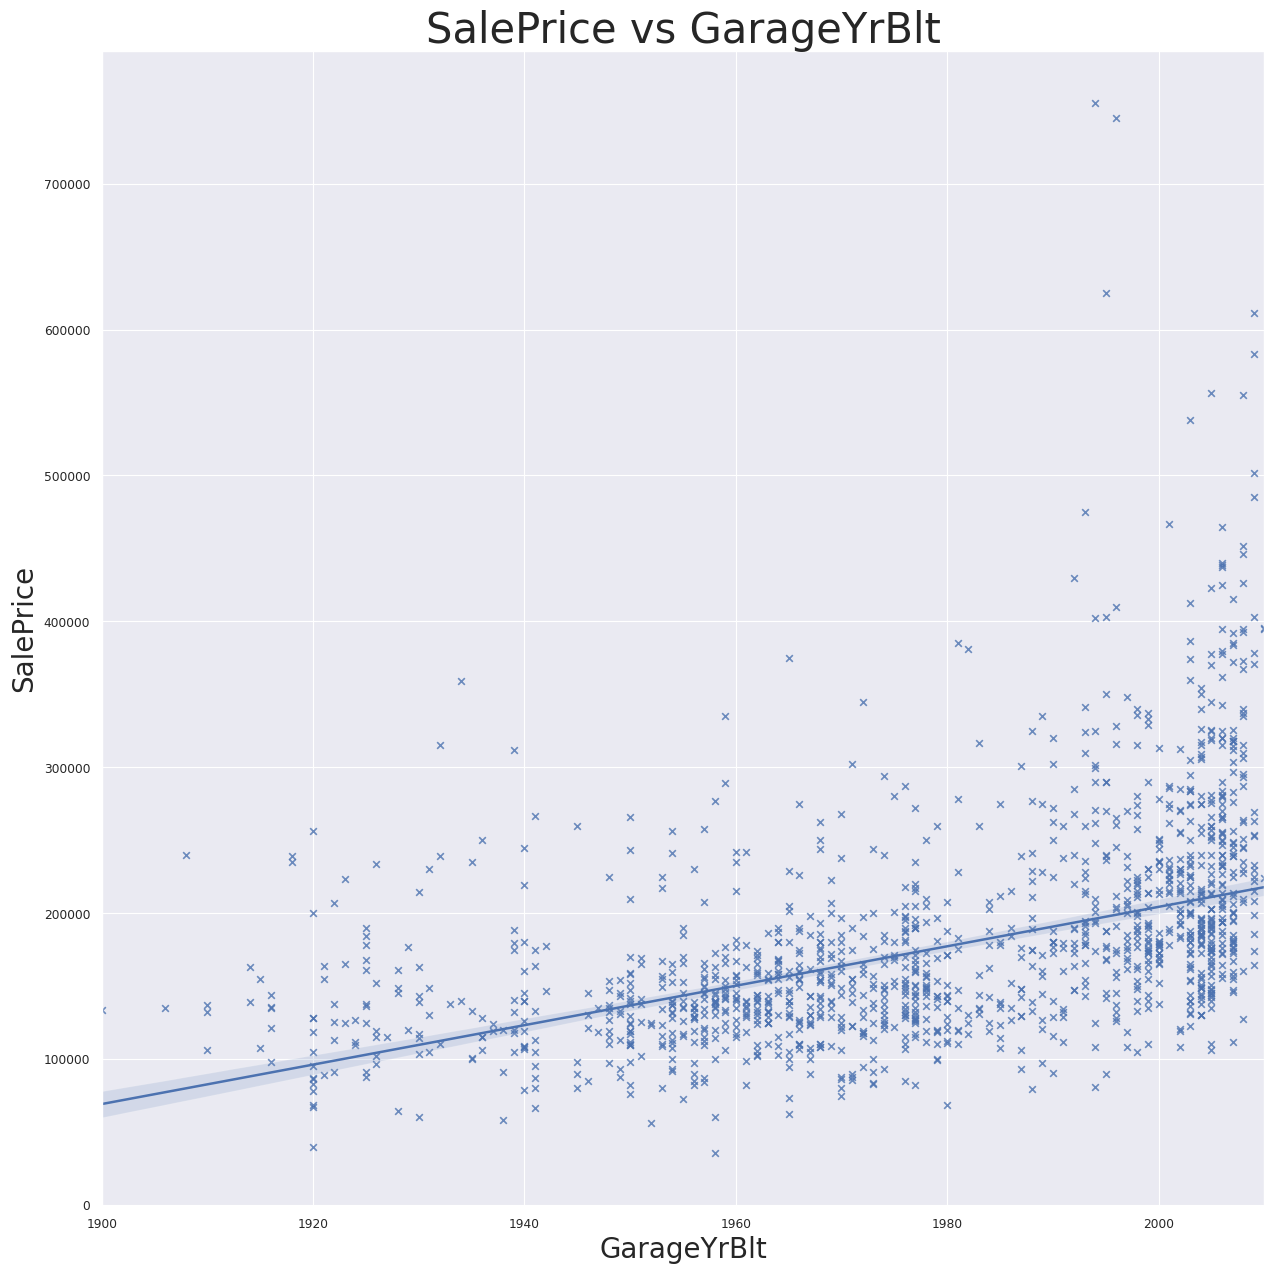

In [82]:
dataset_cols=['YearBuilt','GarageYrBlt']

# Plot each variable in a separate subplot
for col in dataset_cols:
    sns.set_theme()
    sns.set_context('paper')
    plt.figure(figsize=(15, 15))  # Set the figure size for each subplot
    scatter_plot = sns.regplot(data=df, x=col, y="SalePrice", marker='x', robust=True)
    scatter_plot.set_title(f'SalePrice vs {col}', fontsize=30)  # Setting title for each plot
    plt.xlabel(col, fontsize=20)  # Optionally set the x-axis label
    plt.ylabel('SalePrice', fontsize=20)  # Optionally set the y-axis label
    plt.show()  # Show plot

# Conclusions

Let's generate plots one more time, and save it to folder. The client might not understand the shorthand variables, hence it is imporatnt to show explicitly what it means.

In [85]:
dataset_cols = ['GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'GarageArea','YearBuilt','GarageYrBlt']
x_labels=['Ground Living Area', ' Total Basement Square Feet', 'First Floor Square Feet','Garage Area','Original Construction Year','Year Garage was built']
titles=[
    'Sale Price vs Ground Living Area',
    'Sale Price vs Total Basement Square Feet',
    'Sale Price vs First Floor Square Feet',
    'Sale Price vs Garage Area',
    'Sale Price vs Original Construction Year',
    'Sale Price vs Year Garage was built'
]

tags = list(zip(dataset_cols,x_labels,titles))

print(tags)

[('GrLivArea', 'Ground Living Area', 'Sale Price vs Ground Living Area'), ('TotalBsmtSF', ' Total Basement Square Feet', 'Sale Price vs Total Basement Square Feet'), ('1stFlrSF', 'First Floor Square Feet', 'Sale Price vs First Floor Square Feet'), ('GarageArea', 'Garage Area', 'Sale Price vs Garage Area'), ('YearBuilt', 'Original Construction Year', 'Sale Price vs Original Construction Year'), ('GarageYrBlt', 'Year Garage was built', 'Sale Price vs Year Garage was built')]


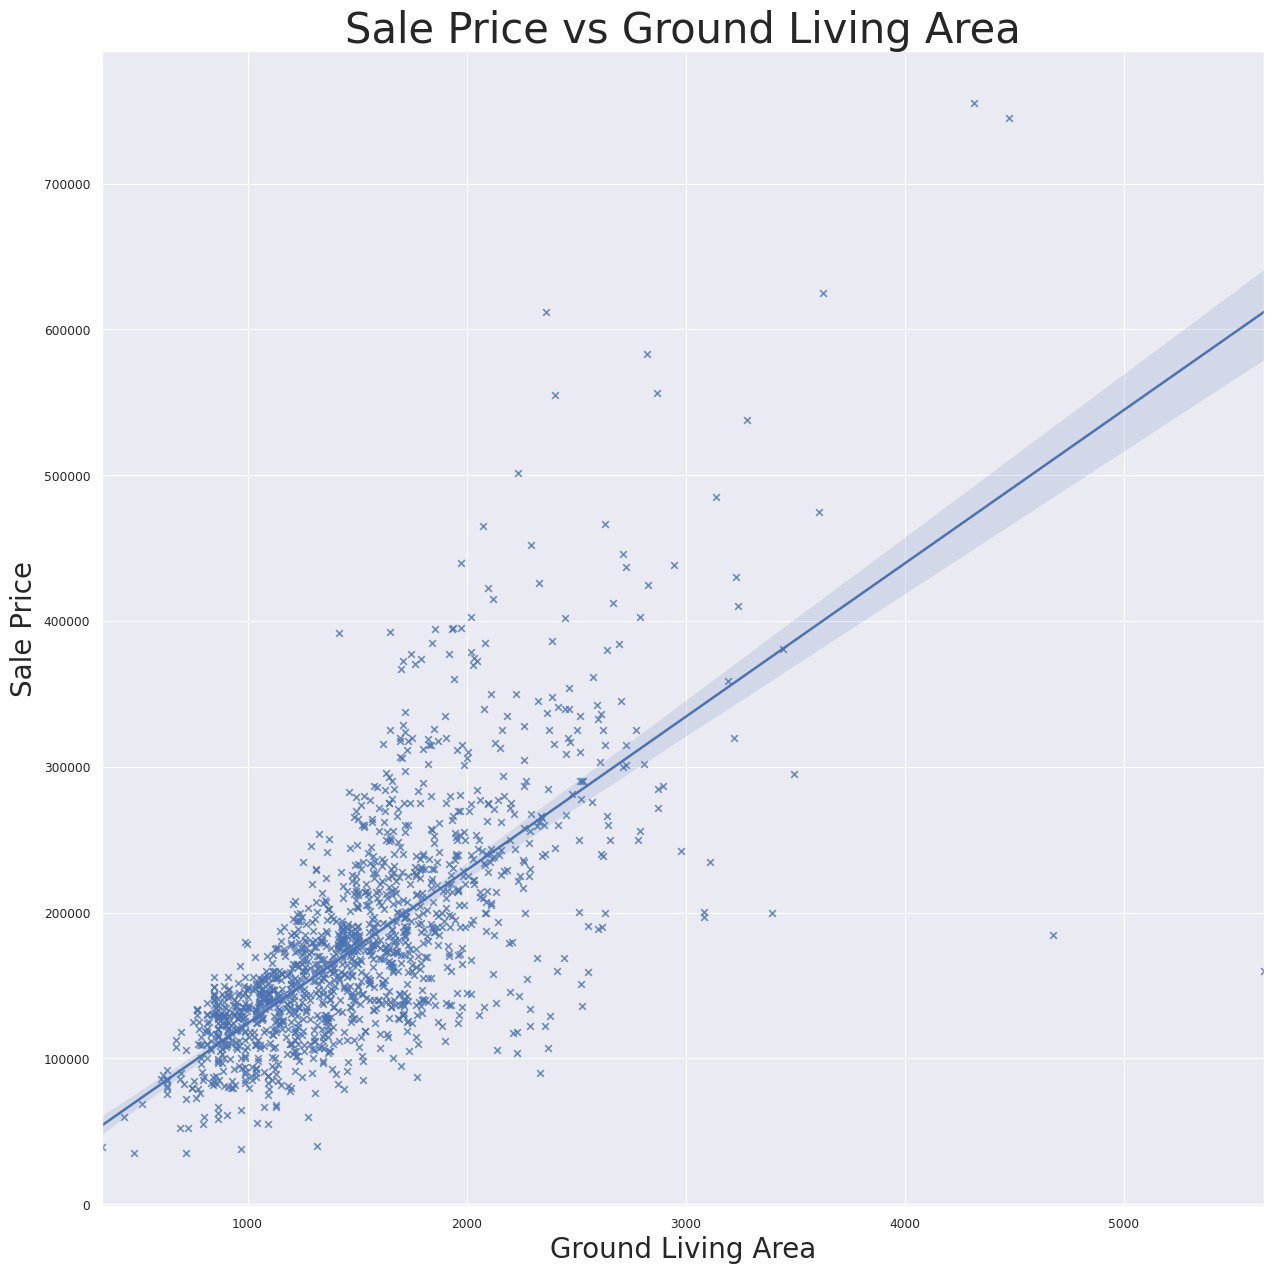

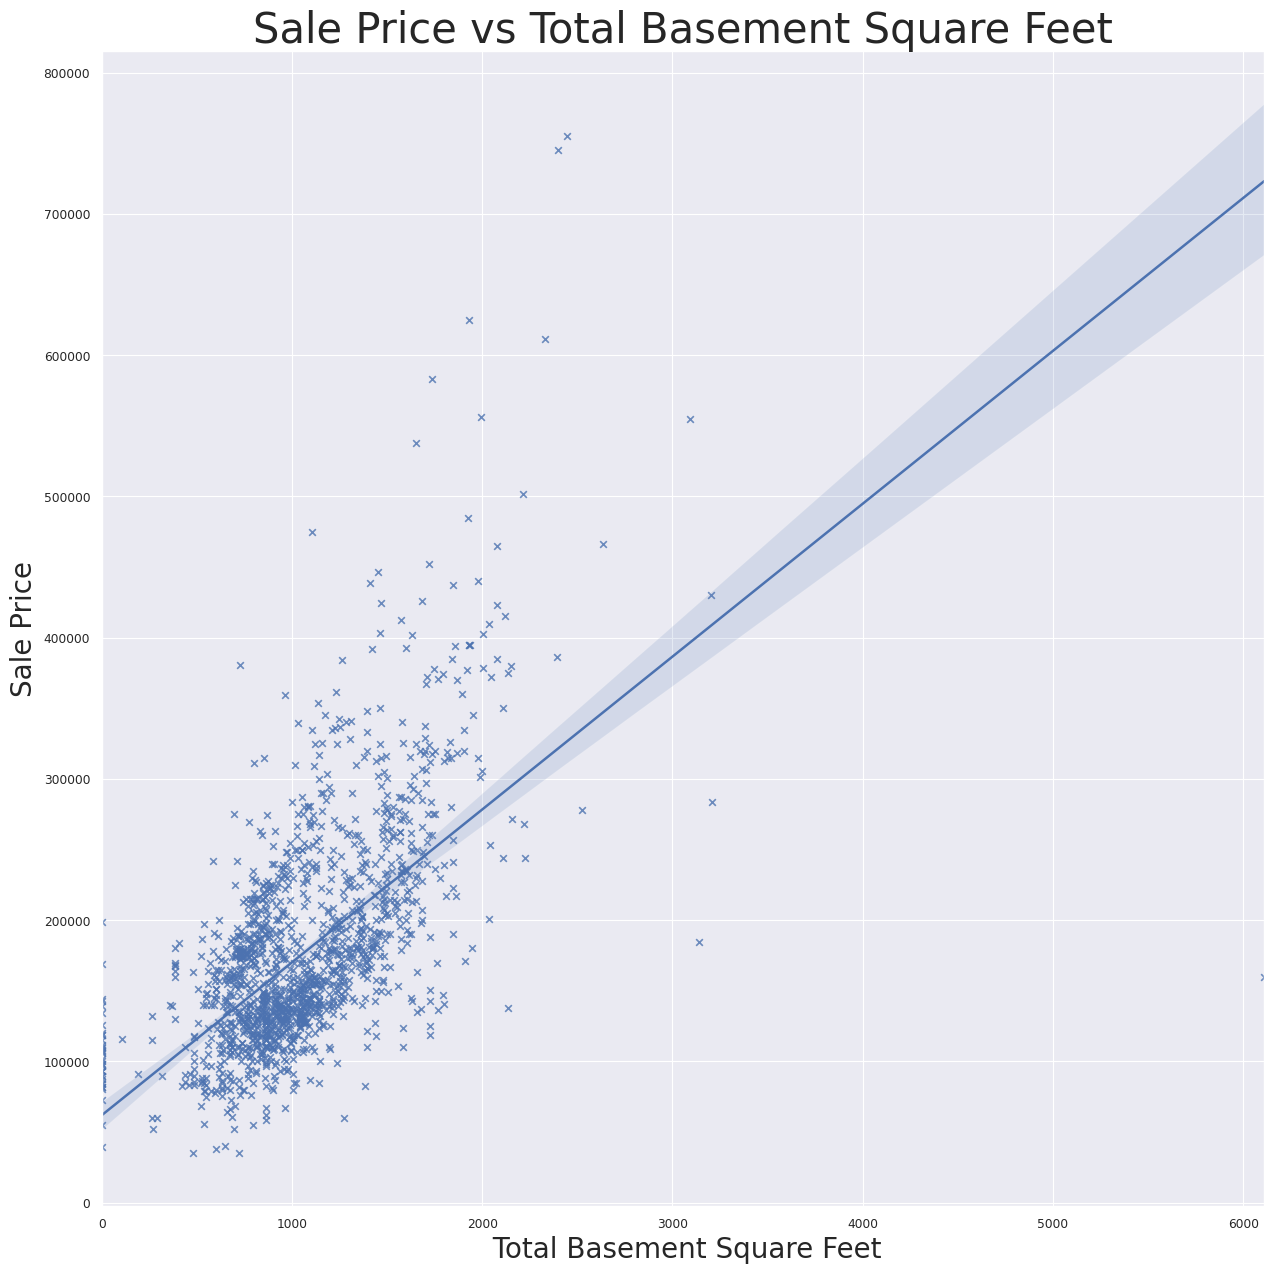

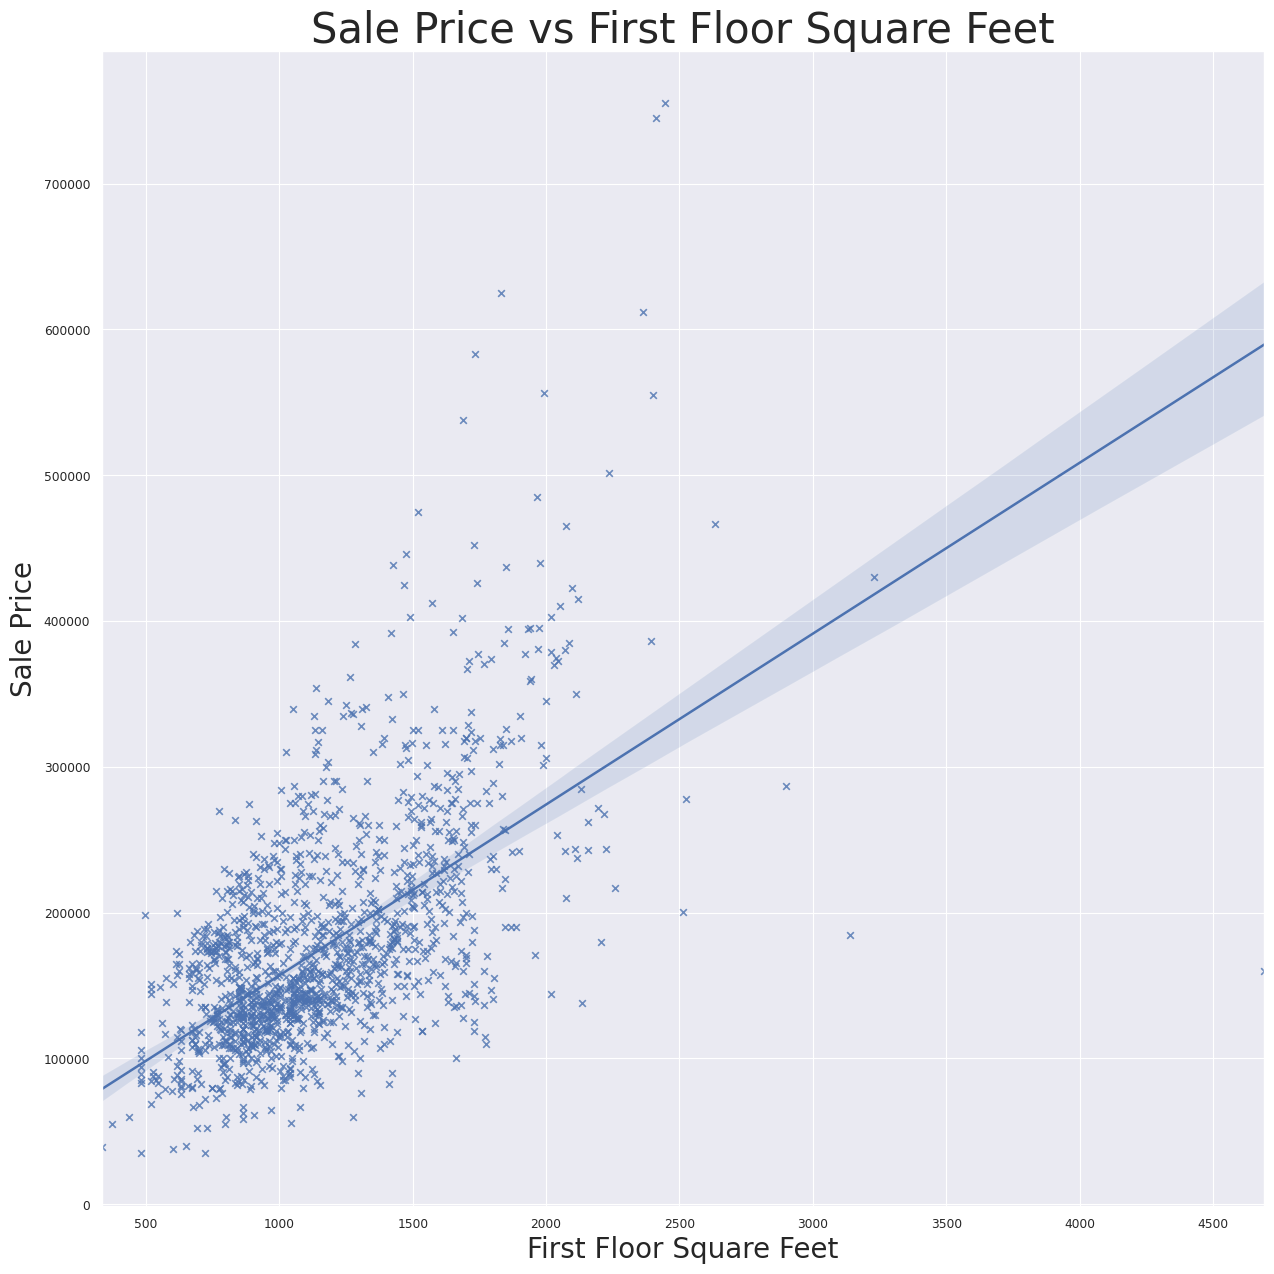

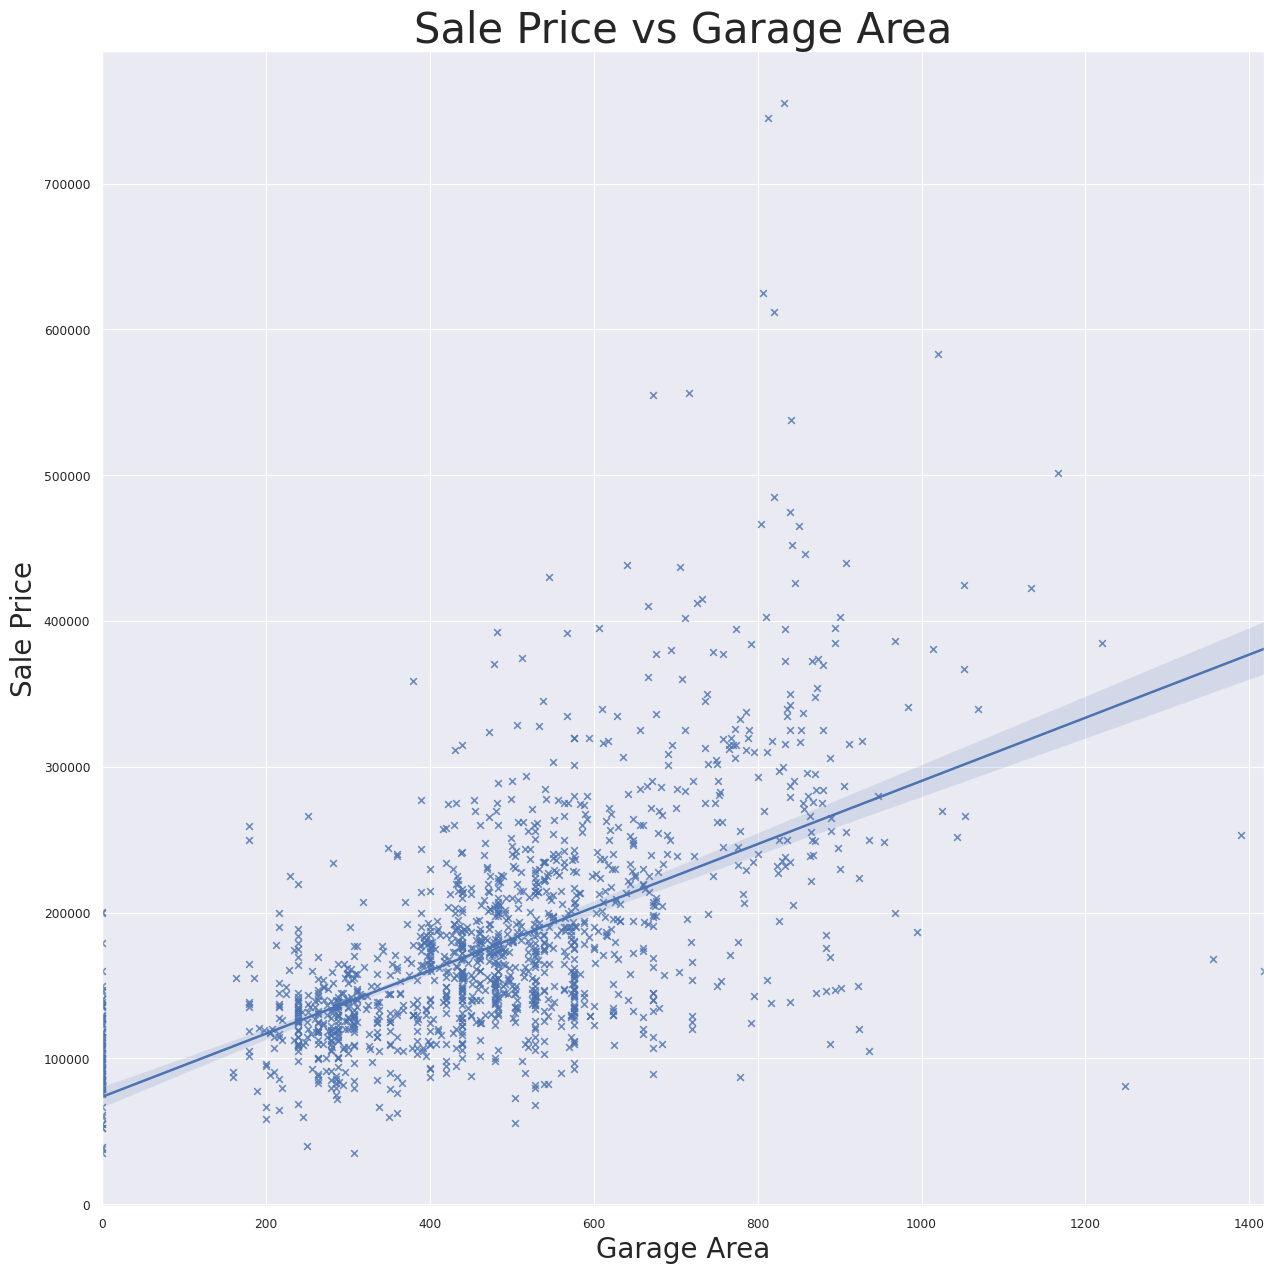

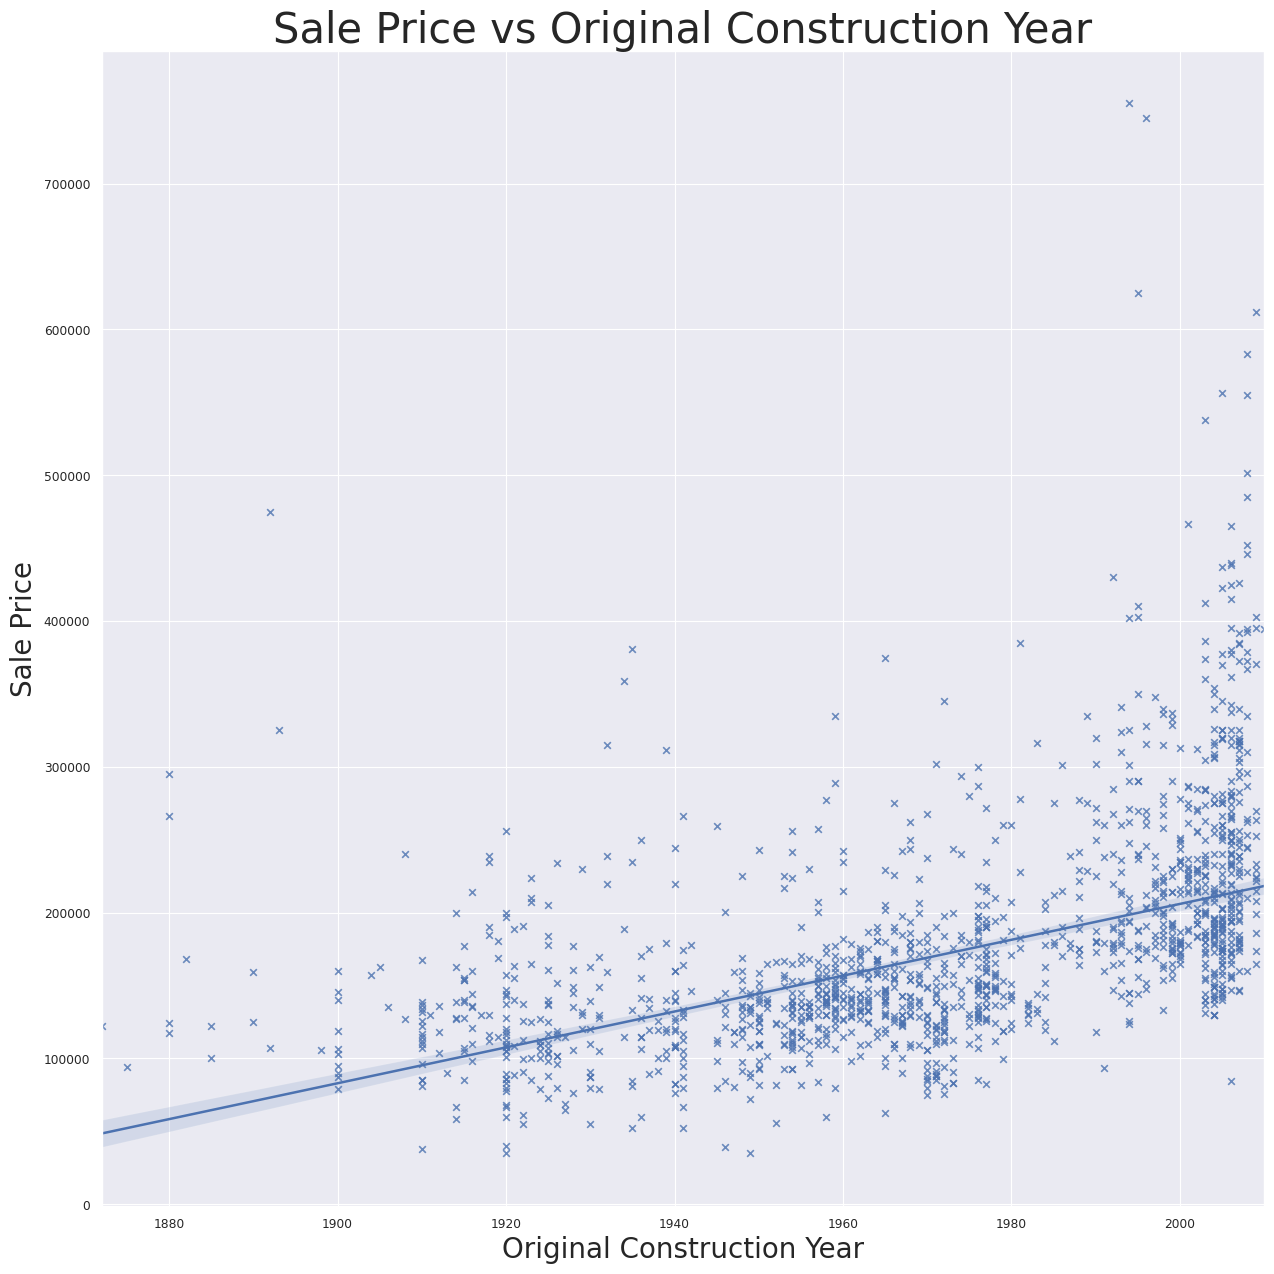

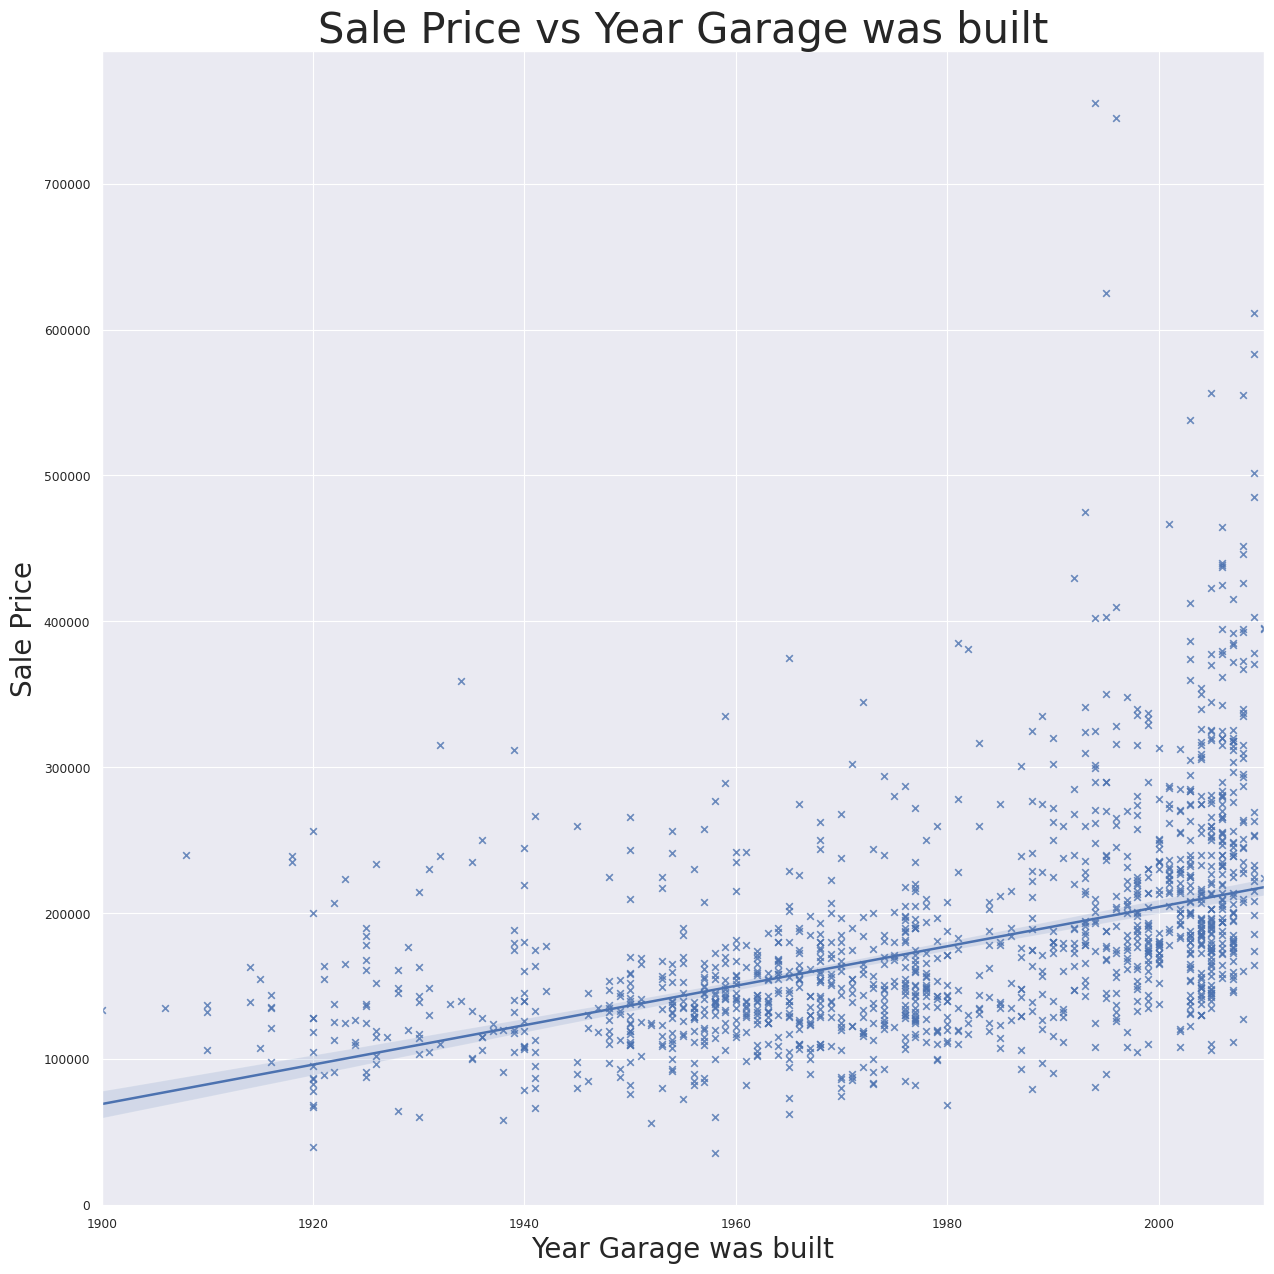

In [88]:

# Plot each variable in a separate subplot
for dataset_col,x_label,title in tags:
    sns.set_theme()
    sns.set_context('paper')
    plt.figure(figsize=(15, 15))  # Set the figure size for each subplot

    # set robust = True reduce the effect of outliers
    scatter_plot = sns.regplot(data=df, x=dataset_col, y="SalePrice", marker='x', robust=True) 
    
    scatter_plot.set_title(title, fontsize=30)  # Setting title for each plot
    
    # set labels
    plt.xlabel(x_label, fontsize=20)  # Optionally set the x-axis label
    plt.ylabel('Sale Price', fontsize=20)  # Optionally set the y-axis label
    plt.show()  # Show plot

    # save plot
    file_name = f"{title.replace(' ', '_').lower()}.png"  # Create a filename from the title
    plt.savefig('docs/images/'+ file_name)  # Save the figure
    plt.close()